In [1]:
import matplotlib.pyplot as plt
from typing import Literal
import numpy as np

E, A, B = 1.69, 406.4, 410.7
#epoch values 
# E, A, B = 1.8172, 482.01, 2085.43
alpha, beta = .34, .28
G = (alpha * A/(beta * B)) ** (1/(alpha + beta))


a_K, b_K = .73, .27
a_C, b_C =  .46, .54


In [2]:
def chinchilla_loss(N, D, irr_loss = False):
    return (0 if not irr_loss else E) + A/(N ** alpha) + B/(D ** beta)

# kaplan_n_constant = 3.6331917579105387e-06 #9e-7
# kaplan_n_constant =  3.6331917579105387e-06 
# kaplan_n_constant = 9e-7
# kaplan_n_constant = 3.6331917579105387e-06
kaplan_n_constant = 3.6331917579105387e-06
def N_opt(C, paper = Literal['kaplan', 'chinchila']):
    if (paper == 'kaplan'):
        return kaplan_n_constant * C**a_K
    elif paper == 'chinchilla':
        return G * (C/6) ** a_C

def D_opt(C, paper = Literal['kaplan', 'chinchila']):
    if (paper == 'kaplan'):
        return 1/(6 * kaplan_n_constant) * C**b_K
    elif paper == 'chinchilla':
        return (1/G) * (C/6) ** b_C


def chinchilla_optimal(C):
    return chinchilla_loss(N_opt(C, 'chinchilla'), D_opt(C, 'chinchilla')) 



def kaplan_optimal(C):
    return chinchilla_loss(N_opt(C, 'kaplan'), D_opt(C, 'kaplan')) 

[5.3488528056778755, 5.16330264535838, 4.984190894531515, 4.811294086384072, 4.644396512378409, 4.483289952828887, 4.327773416837203, 4.1776528912614275, 4.032741098404871, 3.892857262121798, 3.7578268820475444, 3.627481515670757, 3.5016585679752756, 3.3802010883886906, 3.262957574783663, 3.149781784286994, 3.040532550659942, 2.9350736080214586, 2.833273420693968, 2.735005018958992, 2.6401458405173113, 2.548577577455478, 2.4601860285273482, 2.3748609565660246, 2.2924959508479703, 2.2129882942372503, 2.1362388349438284, 2.062151862735641, 1.9906349894497382, 1.9215990336531372, 1.8549579093092259, 1.7906285183105766, 1.7285306467438788, 1.6685868647573252, 1.610722429905315, 1.5548651938496851, 1.5009455123008908, 1.4488961580865762, 1.3986522372389067, 1.3501511079957997, 1.3033323026148596, 1.2581374519023047, 1.2145102123625753, 1.1723961958776075, 1.1317429018279137, 1.0924996515706469, 1.054617525192785, 1.0180493004604163, 0.9827493938878559, 0.9486738038529644, 0.9157800556875937

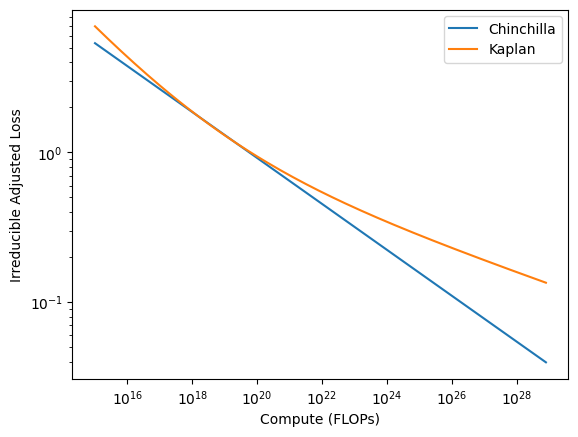

In [3]:
Cs = [10 ** i for i in np.arange(15, 29, 0.1)]

kaplan_losses = list(map(kaplan_optimal, Cs))
chinchilla_losses = list(map(chinchilla_optimal, Cs))

plt.plot(Cs, chinchilla_losses , label = 'Chinchilla')
plt.plot(Cs, kaplan_losses, label = 'Kaplan')

print(chinchilla_losses)
print(kaplan_losses)
print(np.array(kaplan_losses)/ np.array(chinchilla_losses))

plt.ylabel("Irreducible Adjusted Loss")
plt.xlabel("Compute (FLOPs)")

plt.yscale('log')
plt.xscale('log')


plt.legend()

In [4]:
import math
import numpy as np

def find_x_for_y(xs, ys, target_y, log_x=True, log_y=True):
    """
    Given ordered lists xs and ys, find the x value that corresponds to target_y
    using linear interpolation/extrapolation in linear or log space.
    
    Args:
        xs: list of x values (should be ordered)
        ys: list of y values corresponding to xs
        target_y: the y value to find the corresponding x for
        log_x: if True, interpolate in log(x) space
        log_y: if True, interpolate in log(y) space
    
    Returns:
        x value corresponding to target_y
    """
    xs = list(xs)
    ys = list(ys)
    
    # Handle edge cases
    if len(xs) != len(ys):
        raise ValueError("xs and ys must have the same length")
    if len(xs) < 2:
        raise ValueError("Need at least 2 points for interpolation")
    
    # Check for positive values if using log scaling
    if log_x and any(x <= 0 for x in xs):
        raise ValueError("All x values must be positive when using log_x=True")
    if log_y and (any(y <= 0 for y in ys) or target_y <= 0):
        raise ValueError("All y values and target_y must be positive when using log_y=True")
    
    # Transform to log space if needed
    if log_x:
        xs_work = [math.log(x) for x in xs]
    else:
        xs_work = xs[:]
    
    if log_y:
        ys_work = [math.log(y) for y in ys]
        target_y_work = math.log(target_y)
    else:
        ys_work = ys[:]
        target_y_work = target_y
    
    # Find the appropriate segment for interpolation/extrapolation
    if target_y_work <= min(ys_work):
        # Use first two points for extrapolation
        x1, x2 = xs_work[0], xs_work[1]
        y1, y2 = ys_work[0], ys_work[1]
    elif target_y_work >= max(ys_work):
        # Use last two points for extrapolation
        x1, x2 = xs_work[-2], xs_work[-1]
        y1, y2 = ys_work[-2], ys_work[-1]
    else:
        # Find the two points that bracket target_y_work
        for i in range(len(ys_work) - 1):
            if ys_work[i] <= target_y_work <= ys_work[i + 1] or ys_work[i] >= target_y_work >= ys_work[i + 1]:
                x1, x2 = xs_work[i], xs_work[i + 1]
                y1, y2 = ys_work[i], ys_work[i + 1]
                break
    
    # Linear interpolation/extrapolation in the (possibly transformed) space
    if y2 == y1:  # Avoid division by zero
        x_target_work = x1
    else:
        x_target_work = x1 + (target_y_work - y1) * (x2 - x1) / (y2 - y1)
    
    # Transform back from log space if needed
    if log_x:
        x_target = math.exp(x_target_work)
    else:
        x_target = x_target_work
    
    return x_target

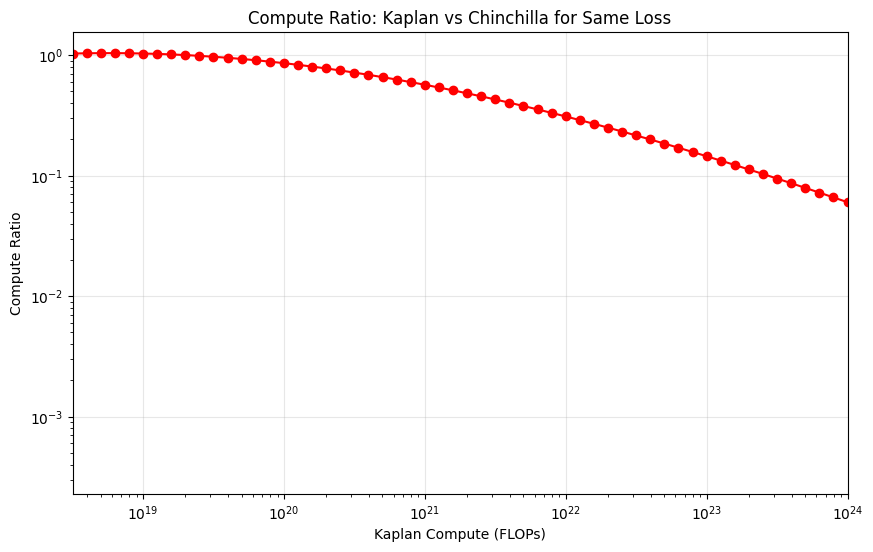

[(1000000000000000.0, 0.18007804468898914), (1258925411794166.2, 0.19628088076625694), (1584893192461111.0, 0.21356044087286777), (1995262314968874.8, 0.2319381205385528), (2511886431509572.0, 0.25142877732211627), (3162277660168366.5, 0.2720398175143836), (3981071705534953.0, 0.30000016269777297), (5011872336272694.0, 0.32319363962272946), (6309573444801891.0, 0.347481790707921), (7943282347242757.0, 0.3728317276149774), (9999999999999918.0, 0.39919894681009555), (1.2589254117941508e+16, 0.4265267956089462), (1.584893192461098e+16, 0.4547452435811844), (1.9952623149688664e+16, 0.4837712811903189), (2.511886431509551e+16, 0.5135086358130444), (3.1622776601683276e+16, 0.5438476206088443), (3.98107170553492e+16, 0.5746651834278332), (5.011872336272674e+16, 0.6058257672009173), (6.309573444801839e+16, 0.637181891534683), (7.94328234724266e+16, 0.6685751517741906), (9.999999999999837e+16, 0.6998368111412819), (1.2589254117941507e+17, 0.7307898785961404), (1.584893192461085e+17, 0.761250488

In [5]:
compute_ratios, valid_computes = [], []

for k_loss, C in zip(kaplan_losses, Cs):
    ratio =find_x_for_y(Cs, chinchilla_losses, k_loss)/C
    ratio= ratio
    compute_ratios.append(ratio)
    valid_computes.append(C)

# Ensure the axis limits are floats to avoid type errors
x_min = float(10**18.5)
x_max = float(10**24)

# Plot the result

plt.figure(figsize=(10, 6))
plt.plot(valid_computes, compute_ratios, 'o-', color='red', label='C_Kaplan / C_Chinchilla')
plt.xscale('log')
plt.xlim(x_min, x_max)
plt.ylabel("Compute Ratio")
plt.xlabel("Kaplan Compute (FLOPs)")
plt.title("Compute Ratio: Kaplan vs Chinchilla for Same Loss")
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()
print(list(zip(valid_computes, compute_ratios)))

# Adjusted Plot

In [6]:
((3.3*10**-13)**-0.73)*(8.64*10**19)**-0.73

3.612682471156972e-06

Compute range: 1.68e+17 → 5.50e+22


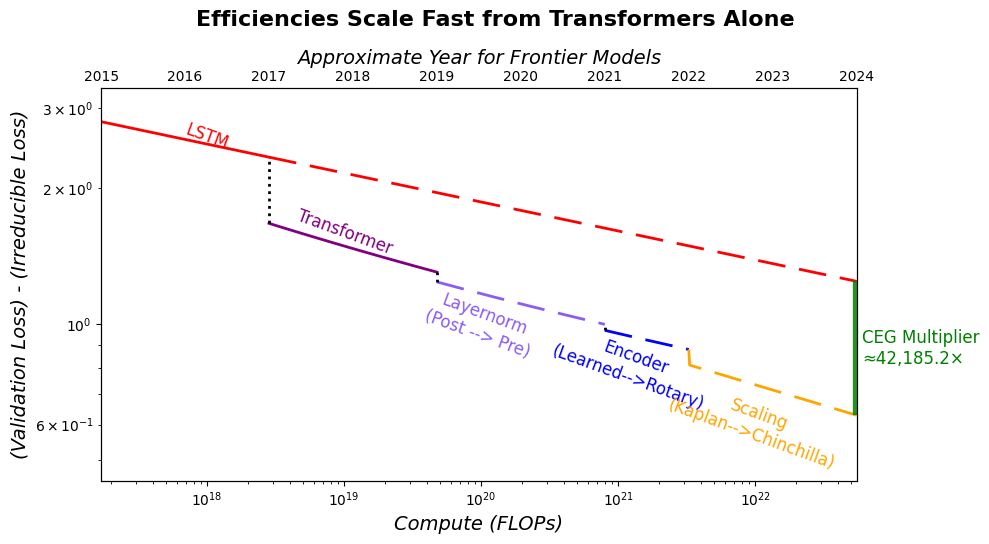

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, FuncFormatter
from scipy.interpolate import interp1d

# Configuration
CONFIG = {
    'plot_years': (2015.0, 2024.0),
    'colors': {
        'baseline': 'red',
        'segments': ['red', 'purple', '#8B5CF6', 'blue', 'orange'],
        'transition': 'black',
        'efficiency': 'green'
    },
    'transitions': [
        ('Transformer', 1e19, 3.4 - E),
        ('Layernorm\n(Post --> Pre)', 10**20, 1),
        ('Encoder\n(Learned-->Rotary)', 10**21.1, 0.8),
        ('Scaling\n(Kaplan-->Chinchilla)', 10**22, 0.6)
    ],
    'label_rotation': -20,
    'fontsize': 12
}

A0, alpha0, E = 35.5, 0.064, 1.8

# Same A and alpha across 2022 boundary (no architectural change, just training optimization)
A_post_rotary = 80*((1.27*1.1*1.73)**-0.091)
segments = [
    (-np.inf, 2017, A0, alpha0),
    (2017, 2019.0, 80, 0.091),
    (2019, 2021, 80*(1.73**-0.091), 0.091),
    (2021, 2022, A_post_rotary, 0.091),  # With Kaplan/Chinchilla multiplier
    (2022, np.inf, A_post_rotary, 0.091),  # Without multiplier (Chinchilla optimal baked in)
]

def year_to_compute(year, y0=2013, C0=1e16, k=np.log(4.1)/1.0):
    return C0 * np.exp(k * (year - y0))

# Create interpolation function for compute multiplier
# Using the compute ratios from the Kaplan vs Chinchilla comparison
multiplier_interp = interp1d(
    np.log10(valid_computes), 
    compute_ratios, 
    kind='linear',
    fill_value='extrapolate'
)

def get_compute_multiplier(C, year):
    """
    Get the compute multiplier for a given compute and year.
    Only applies the multiplier for years 2017-2022.
    """
    if 2017 <= year <= 2022:
        # Apply the Kaplan/Chinchilla ratio as multiplier
        # Note: compute_ratios are already actual ratios, not log-space
        return multiplier_interp(np.log10(C))
    else:
        return 1.0

def chinchilla_irreducible(A, alpha, C, year=None, is_baseline=False):
    """
    Compute loss with optional compute multiplier.
    If year is between 2017-2022 AND not baseline, applies multiplier: A * (C * multiplier)^(-alpha)
    Otherwise: A * C^(-alpha)
    
    Args:
        is_baseline: If True, never apply the multiplier (for LSTM baseline)
    """
    if year is not None and not is_baseline:
        multiplier = get_compute_multiplier(C, year)
        return A * ((C * multiplier) ** (-alpha))
    else:
        return A * (C ** (-alpha))

def compute_to_year(C, y0=2013, C0=1e16, k=np.log(4.1)/1.0):
    """Convert compute back to approximate year."""
    return y0 + np.log(C / C0) / k

def plot_transition(ax, segments, idx, label, label_x, label_y, label_color='black', line_color='black', rotation=20, fontsize=10):
    """Plot transition line and label between two segments."""
    _, y_trans, A1, a1 = segments[idx]
    _, _, A2, a2 = segments[idx + 1]
    
    C_trans = year_to_compute(y_trans)
    # First segment (idx 0) is the baseline LSTM
    L1 = chinchilla_irreducible(A1, a1, C_trans, year=y_trans, is_baseline=(idx == 0))
    L2 = chinchilla_irreducible(A2, a2, C_trans, year=y_trans, is_baseline=False)
    
    ax.plot([C_trans, C_trans], [min(L1, L2), max(L1, L2)],
            ':', linewidth=2, color=line_color)
    ax.text(label_x, label_y, label, color=label_color, ha='center', va='center', rotation=rotation, fontsize=fontsize)

# Setup
fig, ax = plt.subplots(figsize=(10, 5.5))
fig.suptitle("Efficiencies Scale Fast from Transformers Alone", fontsize=16, fontweight='bold')
ax.set_xscale('log')
ax.set_yscale('log')

plot_year_start, plot_year_end = CONFIG['plot_years']
compute_min = year_to_compute(plot_year_start)
compute_max = year_to_compute(plot_year_end)

print(f"Compute range: {compute_min:.2e} → {compute_max:.2e}")

# Plot baseline - split at 2017 transition
transformer_transition_year = 2017
C_transition = year_to_compute(transformer_transition_year)

# Solid red line up to 2017
C_grid_solid = np.logspace(np.log10(compute_min), np.log10(C_transition), 600)
years_solid = compute_to_year(C_grid_solid)
baseline_losses_solid = np.array([chinchilla_irreducible(A0, alpha0, C, year=y, is_baseline=True) 
                                   for C, y in zip(C_grid_solid, years_solid)])
ax.plot(C_grid_solid, baseline_losses_solid, color=CONFIG['colors']['baseline'], linewidth=2)

# Dashed red line from 2017 onwards
C_grid_dashed = np.logspace(np.log10(C_transition), np.log10(compute_max), 600)
years_dashed = compute_to_year(C_grid_dashed)
baseline_losses_dashed = np.array([chinchilla_irreducible(A0, alpha0, C, year=y, is_baseline=True) 
                                    for C, y in zip(C_grid_dashed, years_dashed)])
ax.plot(C_grid_dashed, baseline_losses_dashed, color=CONFIG['colors']['baseline'], 
        linewidth=2, linestyle='--', dashes=(10, 5))

C_lstm_label = 1e18
ax.text(C_lstm_label, 2.6, "LSTM", color=CONFIG['colors']['baseline'], 
        ha='center', va='center', rotation=CONFIG['label_rotation'], fontsize=CONFIG['fontsize'])

# Plot segments and track loss range
loss_min = min(baseline_losses_solid.min(), baseline_losses_dashed.min())
loss_max = max(baseline_losses_solid.max(), baseline_losses_dashed.max())

for idx, (y_start, y_end, A, alpha) in enumerate(segments):
    # Skip baseline segment (idx 0) as it's plotted separately
    if idx == 0:
        continue
    
    y_start = max(y_start, plot_year_start)
    y_end = min(y_end, plot_year_end)
    if y_end <= y_start:
        continue
    
    # For Transformer segment (idx 1), split into solid and dashed at 2019
    if idx == 1:  # Transformer segment (2017-2019)
        layernorm_transition_year = 2019
        
        # Solid purple line from 2017 to 2019
        years_seg_solid = np.linspace(y_start, layernorm_transition_year, 100)
        C_seg_solid = year_to_compute(years_seg_solid)
        L_seg_solid = np.array([chinchilla_irreducible(A, alpha, C, year=y) 
                                for C, y in zip(C_seg_solid, years_seg_solid)])
        ax.plot(C_seg_solid, L_seg_solid, color=CONFIG['colors']['segments'][idx], linewidth=2)
        
        # Dashed purple line from 2019 to end of segment
        years_seg_dashed = np.linspace(layernorm_transition_year, y_end, 100)
        C_seg_dashed = year_to_compute(years_seg_dashed)
        L_seg_dashed = np.array([chinchilla_irreducible(A, alpha, C, year=y) 
                                 for C, y in zip(C_seg_dashed, years_seg_dashed)])
        ax.plot(C_seg_dashed, L_seg_dashed, color=CONFIG['colors']['segments'][idx], 
                linewidth=2, linestyle='--', dashes=(10, 5))
        
        loss_min = min(loss_min, L_seg_solid.min(), L_seg_dashed.min())
        loss_max = max(loss_max, L_seg_solid.max(), L_seg_dashed.max())
    else:
        # Segments after 2019 (idx >= 2) are all dashed
        years_seg = np.linspace(y_start, y_end, 200)
        C_seg = year_to_compute(years_seg)
        L_seg = np.array([chinchilla_irreducible(A, alpha, C, year=y) 
                         for C, y in zip(C_seg, years_seg)])
        ax.plot(C_seg, L_seg, color=CONFIG['colors']['segments'][idx], 
                linewidth=2, linestyle='--', dashes=(10, 5))
        
        loss_min = min(loss_min, L_seg.min())
        loss_max = max(loss_max, L_seg.max())

# Plot transitions
for i, (label, label_x, label_y) in enumerate(CONFIG['transitions']):
    if i < len(segments) - 1:
        # Use the color of the segment being transitioned TO (i+1) for label
        segment_color = CONFIG['colors']['segments'][i + 1]
        plot_transition(ax, segments, i, label, label_x, label_y, 
                       label_color=segment_color, line_color='black', 
                       rotation=CONFIG['label_rotation'], fontsize=CONFIG['fontsize'])

# Plot efficiency gain
final_year = min(plot_year_end, segments[-1][1])
C_final = year_to_compute(final_year)
matching = [seg for seg in segments if seg[0] <= final_year <= seg[1]]
A_final, alpha_final = matching[0][2], matching[0][3]

L_algo_final = chinchilla_irreducible(A_final, alpha_final, C_final, year=final_year)
L_base_final = chinchilla_irreducible(A0, alpha0, C_final, year=final_year, is_baseline=True)
ax.vlines(C_final, ymin=L_algo_final, ymax=L_base_final,
          color=CONFIG['colors']['efficiency'], linewidth=6, alpha=0.85)

if L_algo_final > 0:
    # Need to find equivalent compute without multiplier
    # For baseline (LSTM), multiplier is 1 before 2017
    C_equiv = (L_algo_final / A0) ** (-1 / alpha0)
    eff_mult = C_equiv / C_final
    eff_text = f"CEG Multiplier\n≈{eff_mult:.1e}×"
    if 1 < eff_mult < 1e6:
        eff_text = f"CEG Multiplier\n≈{eff_mult:,.1f}×"
else:
    eff_text = "CEG Multiplier"

ax.text(C_final * 1.10, (L_algo_final * L_base_final) ** 0.5, 
        eff_text, color=CONFIG['colors']['efficiency'], va='center', fontsize=CONFIG['fontsize'])

# Set axis limits with padding
# Lower ylim is set to 0.3 as requested.
ax.set_xlim(compute_min, C_final)
ax.set_ylim(4.5e-1, None)  # Lower limit at 0.3, upper limit auto

# Add year axis on top
ax_top = ax.twiny()
ax_top.set_xscale('log')
ax_top.set_xlim(ax.get_xlim())

years = np.arange(int(plot_year_start), int(plot_year_end) + 1)
tick_positions = year_to_compute(years)
in_range = (tick_positions >= compute_min) & (tick_positions <= C_final)
ax_top.set_xticks(tick_positions[in_range])
ax_top.set_xticklabels(years[in_range])
ax_top.set_xlabel("Approximate Year for Frontier Models", fontsize=14, style='italic')
ax_top.tick_params(which='both', length=0)  # Remove tick marks

# Format axes
ax.set_xlabel("Compute (FLOPs)", fontsize=14, style='italic')
ax.set_ylabel("(Validation Loss) - (Irreducible Loss)", fontsize=14, style='italic')

plt.tight_layout()
plt.show()

Compute range: 1.68e+17 → 5.50e+22


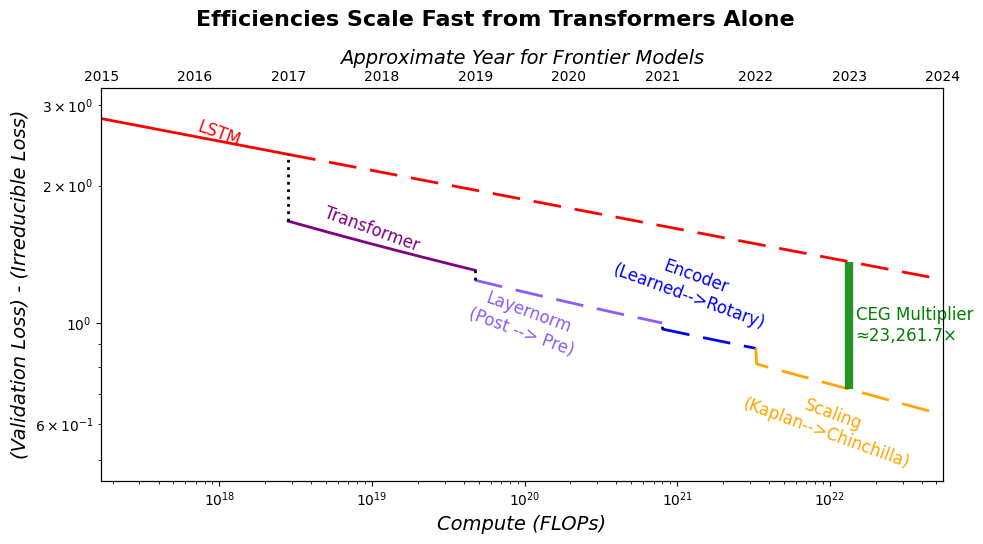

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, FuncFormatter
from scipy.interpolate import interp1d

# Configuration
CONFIG = {
    'plot_years': (2015.0, 2024.0),  # plot through 2024, but CEG at 2023
    'colors': {
        'baseline': 'red',
        'segments': ['red', 'purple', '#8B5CF6', 'blue', 'orange'],
        'transition': 'black',
        'efficiency': 'green'
    },
    'transitions': [
        ('Transformer', 1e19, 3.4 - E),
        ('Layernorm\n(Post --> Pre)', 10**20, 1),
        # Move Encoder label above the line: decrease label_y for upward shift
        ('Encoder\n(Learned-->Rotary)', 10**21.1, 1.25),
        ('Scaling\n(Kaplan-->Chinchilla)', 10**22, 0.6)
    ],
    'label_rotation': -20,
    'fontsize': 12
}

A0, alpha0, E = 35.5, 0.064, 1.8

A_post_rotary = 80 * ((1.27 * 1.1 * 1.73) ** -0.091)
segments = [
    (-np.inf, 2017, A0, alpha0),
    (2017, 2019.0, 80, 0.091),
    (2019, 2021, 80 * ((1.27*1.1*1.73) ** 0.091), 0.091),
    (2021, 2022, (80 * ((1.27*1.1) ** 0.091)), 0.091),  # With Kaplan/Chinchilla multiplier
    (2022, np.inf, A_post_rotary, 0.091),  # Without multiplier (Chinchilla optimal baked in)
]

def year_to_compute(year, y0=2013, C0=1e16, k=np.log(4.1)/1.0):
    return C0 * np.exp(k * (year - y0))

# Create interpolation function for compute multiplier
multiplier_interp = interp1d(
    np.log10(valid_computes), 
    compute_ratios, 
    kind='linear',
    fill_value='extrapolate'
)

def get_compute_multiplier(C, year):
    if 2017 <= year <= 2022:
        return multiplier_interp(np.log10(C))
    else:
        return 1.0

def chinchilla_irreducible(A, alpha, C, year=None, is_baseline=False):
    if year is not None and not is_baseline:
        multiplier = get_compute_multiplier(C, year)
        return A * ((C * multiplier) ** (-alpha))
    else:
        return A * (C ** (-alpha))

def compute_to_year(C, y0=2013, C0=1e16, k=np.log(4.1)/1.0):
    return y0 + np.log(C / C0) / k

def plot_transition(ax, segments, idx, label, label_x, label_y, label_color='black', line_color='black', rotation=20, fontsize=10):
    _, y_trans, A1, a1 = segments[idx]
    _, _, A2, a2 = segments[idx + 1]
    C_trans = year_to_compute(y_trans)
    L1 = chinchilla_irreducible(A1, a1, C_trans, year=y_trans, is_baseline=(idx == 0))
    L2 = chinchilla_irreducible(A2, a2, C_trans, year=y_trans, is_baseline=False)
    ax.plot([C_trans, C_trans], [min(L1, L2), max(L1, L2)],
            ':', linewidth=2, color=line_color)
    ax.text(label_x, label_y, label, color=label_color, ha='center', va='center', rotation=rotation, fontsize=fontsize)

# Setup
fig, ax = plt.subplots(figsize=(10, 5.5))
fig.suptitle("Efficiencies Scale Fast from Transformers Alone", fontsize=16, fontweight='bold')
ax.set_xscale('log')
ax.set_yscale('log')

plot_year_start, plot_year_end = CONFIG['plot_years']
compute_min = year_to_compute(plot_year_start)
compute_max = year_to_compute(plot_year_end)

print(f"Compute range: {compute_min:.2e} → {compute_max:.2e}")

# Plot baseline - split at 2017 transition
transformer_transition_year = 2017
C_transition = year_to_compute(transformer_transition_year)

# Solid red line up to 2017
C_grid_solid = np.logspace(np.log10(compute_min), np.log10(C_transition), 600)
years_solid = compute_to_year(C_grid_solid)
baseline_losses_solid = np.array([chinchilla_irreducible(A0, alpha0, C, year=y, is_baseline=True) 
                                   for C, y in zip(C_grid_solid, years_solid)])
ax.plot(C_grid_solid, baseline_losses_solid, color=CONFIG['colors']['baseline'], linewidth=2)

# Dashed red line from 2017 onwards
C_grid_dashed = np.logspace(np.log10(C_transition), np.log10(compute_max), 600)
years_dashed = compute_to_year(C_grid_dashed)
baseline_losses_dashed = np.array([chinchilla_irreducible(A0, alpha0, C, year=y, is_baseline=True) 
                                    for C, y in zip(C_grid_dashed, years_dashed)])
ax.plot(C_grid_dashed, baseline_losses_dashed, color=CONFIG['colors']['baseline'], 
        linewidth=2, linestyle='--', dashes=(10, 5))

C_lstm_label = 1e18
ax.text(C_lstm_label, 2.6, "LSTM", color=CONFIG['colors']['baseline'], 
        ha='center', va='center', rotation=CONFIG['label_rotation'], fontsize=CONFIG['fontsize'])

# Plot segments and track loss range
loss_min = min(baseline_losses_solid.min(), baseline_losses_dashed.min())
loss_max = max(loss_max := baseline_losses_solid.max(), baseline_losses_dashed.max())

for idx, (y_start, y_end, A, alpha) in enumerate(segments):
    if idx == 0:
        continue
    y_start = max(y_start, plot_year_start)
    y_end = min(y_end, plot_year_end)
    if y_end <= y_start:
        continue

    if idx == 1:  # Transformer segment (2017-2019)
        layernorm_transition_year = 2019

        # Solid purple line from 2017 to 2019
        years_seg_solid = np.linspace(y_start, layernorm_transition_year, 100)
        C_seg_solid = year_to_compute(years_seg_solid)
        L_seg_solid = np.array([chinchilla_irreducible(A, alpha, C, year=y) 
                                for C, y in zip(C_seg_solid, years_seg_solid)])
        ax.plot(C_seg_solid, L_seg_solid, color=CONFIG['colors']['segments'][idx], linewidth=2)

        # Dashed purple line from 2019 to end of segment
        years_seg_dashed = np.linspace(layernorm_transition_year, y_end, 100)
        C_seg_dashed = year_to_compute(years_seg_dashed)
        L_seg_dashed = np.array([chinchilla_irreducible(A, alpha, C, year=y) 
                                 for C, y in zip(C_seg_dashed, years_seg_dashed)])
        ax.plot(C_seg_dashed, L_seg_dashed, color=CONFIG['colors']['segments'][idx], 
                linewidth=2, linestyle='--', dashes=(10, 5))

        loss_min = min(loss_min, L_seg_solid.min(), L_seg_dashed.min())
        loss_max = max(loss_max, L_seg_solid.max(), L_seg_dashed.max())
    else:
        # Segments after 2019 (idx >= 2) are all dashed
        years_seg = np.linspace(y_start, y_end, 200)
        C_seg = year_to_compute(years_seg)
        L_seg = np.array([chinchilla_irreducible(A, alpha, C, year=y) 
                         for C, y in zip(C_seg, years_seg)])
        ax.plot(C_seg, L_seg, color=CONFIG['colors']['segments'][idx], 
                linewidth=2, linestyle='--', dashes=(10, 5))

        loss_min = min(loss_min, L_seg.min())
        loss_max = max(loss_max, L_seg.max())

# Plot transitions
for i, (label, label_x, label_y) in enumerate(CONFIG['transitions']):
    if i < len(segments) - 1:
        # Use the color of the segment being transitioned TO (i+1) for label
        segment_color = CONFIG['colors']['segments'][i + 1]
        plot_transition(
            ax, segments, i,
            label,
            label_x,
            label_y if not ("Encoder" in label) else label_y -0.05,  # Nudge label further above just for Encoder
            label_color=segment_color,
            line_color='black',
            rotation=CONFIG['label_rotation'],
            fontsize=CONFIG['fontsize']
        )

# Plot efficiency gain (CEG) AT 2023 ONLY; plot visible through end of 2024
ceg_year = 2023
C_final = year_to_compute(ceg_year)
matching = [seg for seg in segments if seg[0] <= ceg_year <= seg[1]]
A_final, alpha_final = matching[0][2], matching[0][3]

L_algo_final = chinchilla_irreducible(A_final, alpha_final, C_final, year=ceg_year)
L_base_final = chinchilla_irreducible(A0, alpha0, C_final, year=ceg_year, is_baseline=True)
ax.vlines(C_final, ymin=L_algo_final, ymax=L_base_final,
          color=CONFIG['colors']['efficiency'], linewidth=6, alpha=0.85)

if L_algo_final > 0:
    # Need to find equivalent compute without multiplier
    # For baseline (LSTM), multiplier is 1 before 2017
    C_equiv = (L_algo_final / A0) ** (-1 / alpha0)
    eff_mult = C_equiv / C_final
    eff_text = f"CEG Multiplier\n≈{eff_mult:.1e}×"
    if 1 < eff_mult < 1e6:
        eff_text = f"CEG Multiplier\n≈{eff_mult:,.1f}×"
else:
    eff_text = "CEG Multiplier"

ax.text(C_final * 1.10, (L_algo_final * L_base_final) ** 0.5, 
        eff_text, color=CONFIG['colors']['efficiency'], va='center', fontsize=CONFIG['fontsize'])

# Set axis limits with padding
# Lower ylim is set to 0.3 as requested. Upper limit will fit all lines until 2024.
ax.set_xlim(compute_min, year_to_compute(plot_year_end))
ax.set_ylim(4.5e-1, None)  # Lower limit at 0.3, upper limit auto

# Add year axis on top
ax_top = ax.twiny()
ax_top.set_xscale('log')
ax_top.set_xlim(ax.get_xlim())

years = np.arange(int(plot_year_start), int(plot_year_end) + 1)
tick_positions = year_to_compute(years)
in_range = (tick_positions >= compute_min) & (tick_positions <= year_to_compute(plot_year_end))
ax_top.set_xticks(tick_positions[in_range])
ax_top.set_xticklabels(years[in_range])
ax_top.set_xlabel("Approximate Year for Frontier Models", fontsize=14, style='italic')
ax_top.tick_params(which='both', length=0)  # Remove tick marks

# Format axes
ax.set_xlabel("Compute (FLOPs)", fontsize=14, style='italic')
ax.set_ylabel("(Validation Loss) - (Irreducible Loss)", fontsize=14, style='italic')

plt.tight_layout()
plt.show()